# CS102C Fall 2021 - Python Review

Review items



1. Using Python modules
2. Data sources
3. Graphing data
4. Loops
5. Merging data from two different files
6. 



# Using Python Modules

In [1]:
# working with data manipulation
import pandas as pd
import numpy as np

# graphing data
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('classic')
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# Gather data

## Look into dataset here
1. https://quandl.com (https://data.nasdaq.com/)

## Example - US Population

Fetch CSV file from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state

In [2]:
data_source_file = '2019_Census_US_Population_Data_By_State_Lat_Long.csv'

# load the data file and store in a Pandas DataFrame
df_pop = pd.read_csv(data_source_file)
df_pop.info()
df_pop.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATE            51 non-null     object 
 1   POPESTIMATE2019  51 non-null     int64  
 2   lat              51 non-null     float64
 3   long             51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


# Visualize the 2019 US Population

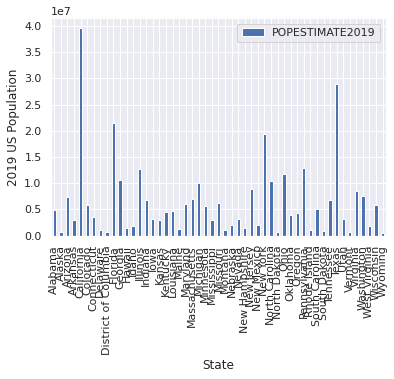

In [3]:
df_pop_by_state = df_pop.set_index('STATE')
df_pop_by_state[['POPESTIMATE2019']].plot(kind='bar',xlabel='State',ylabel='2019 US Population')

# Visualize some statistics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                      POPESTIMATE2019  Mean
STATE                                      
Alabama                       4903185   NaN
Alaska                         731545   NaN
Arizona                       7278717   NaN
Arkansas                      3017804   NaN
California                   39512223   NaN
Colorado                      5758736   NaN
Connecticut                   3565287   NaN
Delaware                       973764   NaN
District of Columbia           705749   NaN
Florida                      21477737   NaN
Georgia                      10617423   NaN
Hawaii                        1415872   NaN
Idaho                         1787065   NaN
Illinois                     12671821   NaN
Indiana                       6732219   NaN
Iowa                          3155070   NaN
Kansas                        2913314   NaN
Kentucky                      4467673   NaN
Louisiana                     4648794   NaN
Maine                         1344212   NaN
Maryland                      60

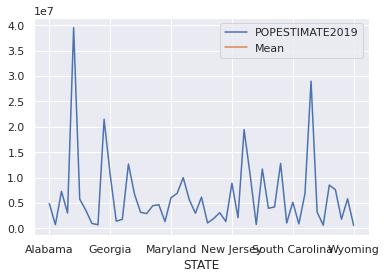

In [4]:
df_pop_stats = df_pop_by_state[['POPESTIMATE2019']]
df_pop_stats['Mean'] = df_pop_stats.agg('mean')
df_pop_stats.plot(kind='line')

print(df_pop_stats)

# Merging data: add more rows because columns are same

In [5]:
btc_2017 = pd.read_csv('./Bitstamp_BTCUSD_2017_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2018 = pd.read_csv('./Bitstamp_BTCUSD_2018_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2019 = pd.read_csv('./Bitstamp_BTCUSD_2019_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2020 = pd.read_csv('./Bitstamp_BTCUSD_2020_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)
btc_2021 = pd.read_csv('./Bitstamp_BTCUSD_2021_minute.csv', parse_dates=['date'], index_col='date', skiprows=1)

In [6]:
btc = pd.concat([btc_2017, btc_2018, btc_2019, btc_2020, btc_2021], axis=0)
btc.info()
btc = btc.drop(['unix','symbol'], axis=1)
btc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525752 entries, 2017-12-31 23:59:00 to 2021-01-01 00:01:00
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   unix        int64  
 1   symbol      object 
 2   open        float64
 3   high        float64
 4   low         float64
 5   close       float64
 6   Volume BTC  float64
 7   Volume USD  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.4+ MB


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


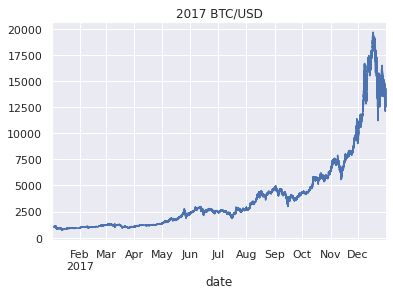

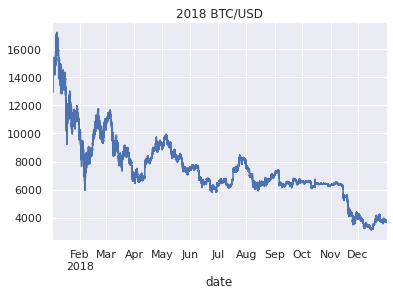

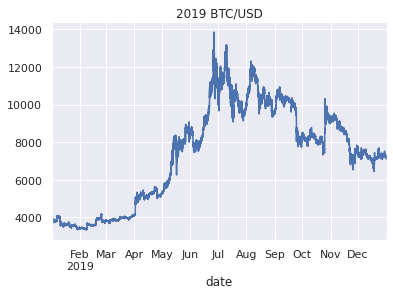

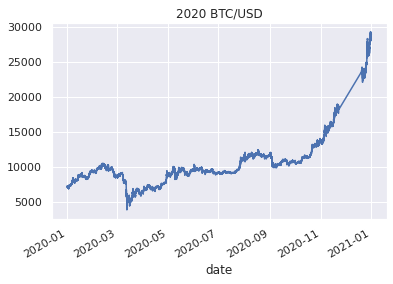

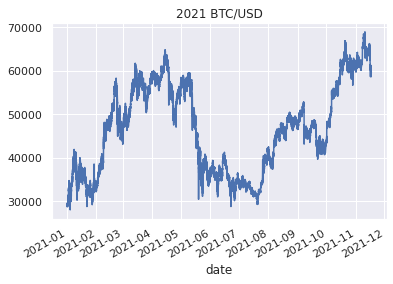

In [7]:
btc.loc['2017','close'].plot(title='2017 BTC/USD')
plt.show()
btc.loc['2018','close'].plot(title='2018 BTC/USD')
plt.show()
btc.loc['2019','close'].plot(title='2019 BTC/USD')
plt.show()
btc.loc['2020','close'].plot(title='2020 BTC/USD')
plt.show()
btc.loc['2021','close'].plot(title='2021 BTC/USD')
plt.show()

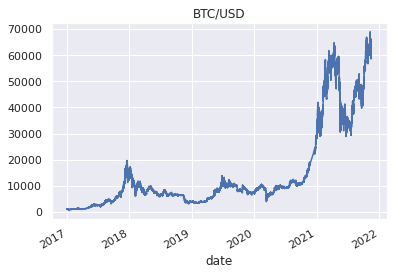

In [8]:
btc['close'].plot(title='BTC/USD')
plt.show()

# Reviewing Python Loops

In [9]:
start = 0
size = 10
increment = 2
my_list = list(range(start, size, increment))
print(my_list)

for value in my_list:
  print(value)

j = start
the_list = []
while (j < size):
  the_list.append(j)
  j = j + increment

print(the_list)

[0, 2, 4, 6, 8]
0
2
4
6
8
[0, 2, 4, 6, 8]


# Reviewing conditionals in Python

In [10]:
my_val = not True

if (my_val):
  print(my_val)
else:
  print("no go")

a = 1
b = 2
c = 3
if (a != 1):
  print('not a')
elif (b!= 2):
  print('not b')
else:
  print('c')

no go
c
